Missing values per column before cleaning:
Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


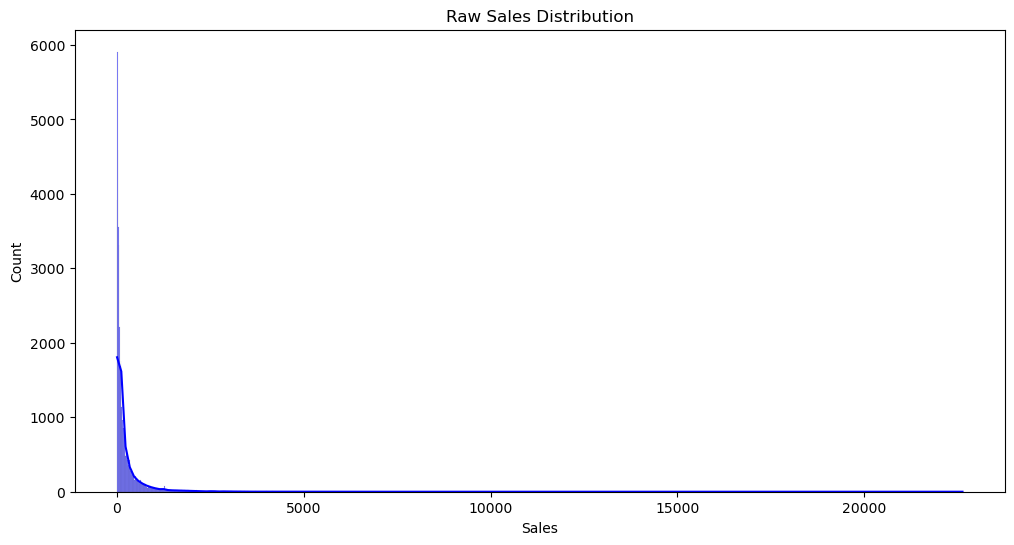

'ProductCategory' column is missing from the dataset.
Missing values after imputation:
Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64
Shape of data after imputation: (51290, 27)


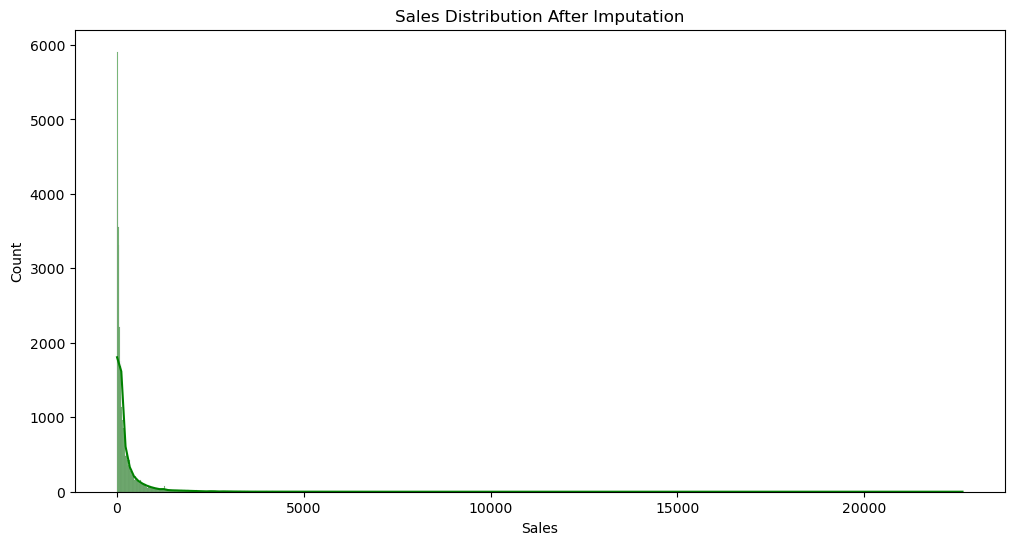

Number of rows after removing duplicates: 51290


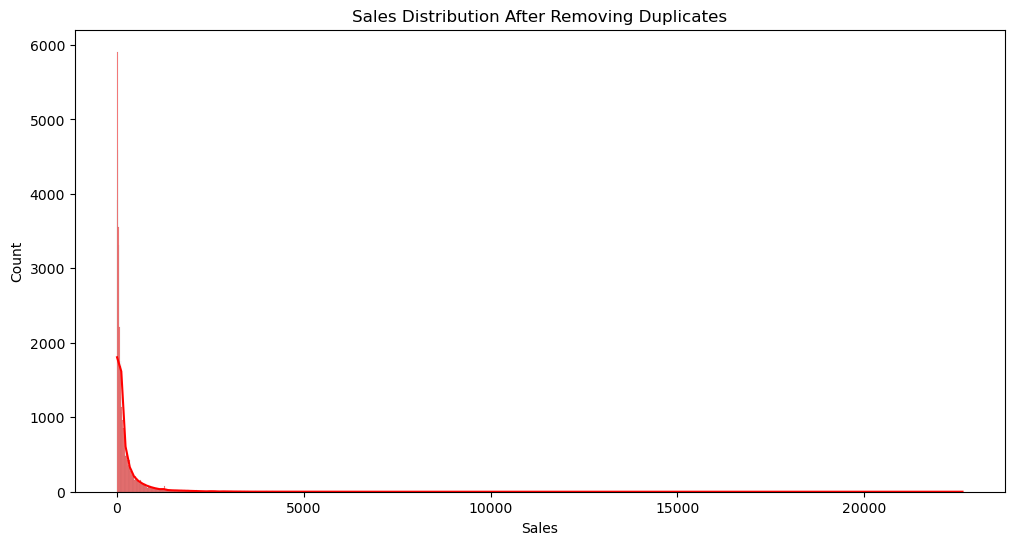

Shape after removing outliers based on Z-scores: 50793


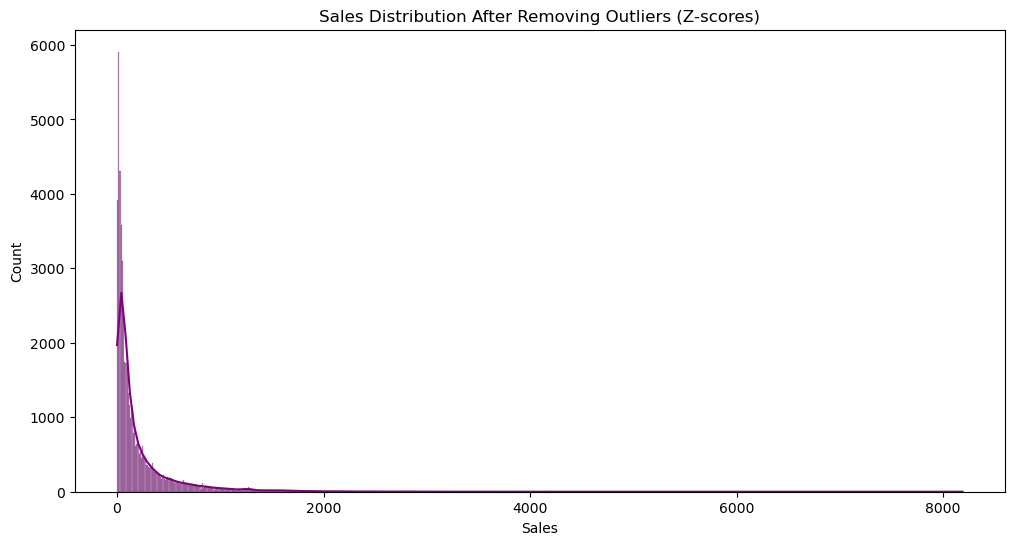

Shape after removing outliers using IQR: 0


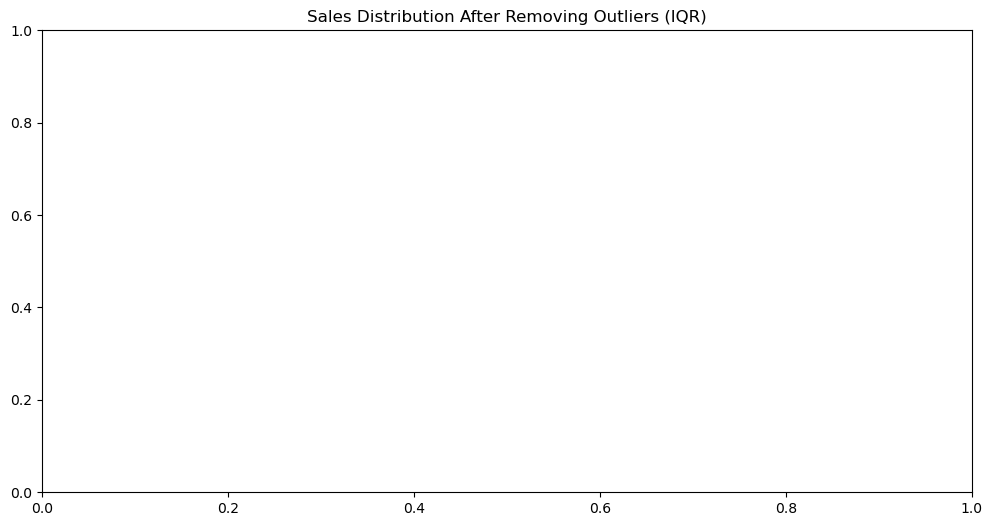

NaN values after cleaning: Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64
No data available for plotting.

Summary Report:
{'Missing Values': Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales       

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy import stats

# Load dataset (update the path as per your file location)
data = pd.read_csv("superstore.csv")

# Ensure column names do not have leading/trailing spaces
data.columns = data.columns.str.strip()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column before cleaning:")
print(missing_values)

# Visualize the data before any cleaning (raw data)
plt.figure(figsize=(12, 6))
sns.histplot(data['Sales'], kde=True, color='blue')
plt.title('Raw Sales Distribution')
plt.show()

# Fill missing values with appropriate measures (mean for numerical columns, mode for categorical)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', etc.
data['Sales'] = imputer.fit_transform(data[['Sales']])
data['Profit'] = imputer.fit_transform(data[['Profit']])

# For categorical columns, use mode imputation
data['Region'] = data['Region'].fillna(data['Region'].mode()[0])

# Check if 'ProductCategory' column exists in the dataset
if 'ProductCategory' in data.columns:
    data['ProductCategory'] = data['ProductCategory'].fillna(data['ProductCategory'].mode()[0])
else:
    print("'ProductCategory' column is missing from the dataset.")

# Check if there are any missing values left
missing_values_after = data.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after)

# Check the shape of the data
print(f"Shape of data after imputation: {data.shape}")

# Visualize the data after imputation to confirm if it's populated
plt.figure(figsize=(12, 6))
sns.histplot(data['Sales'], kde=True, color='green')
plt.title('Sales Distribution After Imputation')
plt.show()

# Remove duplicates
data = data.drop_duplicates()

# Verify that duplicates are removed
print(f"Number of rows after removing duplicates: {data.shape[0]}")

# Visualize the data after removing duplicates
plt.figure(figsize=(12, 6))
sns.histplot(data['Sales'], kde=True, color='red')
plt.title('Sales Distribution After Removing Duplicates')
plt.show()

# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(data[['Sales', 'Profit']]))
outliers = (z_scores > 3).all(axis=1)  # Threshold of 3 for outliers

# Remove outliers
data_no_outliers = data[~outliers]
print(f"Shape after removing outliers based on Z-scores: {data_no_outliers.shape[0]}")

# Visualize data after removing outliers
plt.figure(figsize=(12, 6))
sns.histplot(data_no_outliers['Sales'], kde=True, color='purple')
plt.title('Sales Distribution After Removing Outliers (Z-scores)')
plt.show()

# Calculate IQR
Q1 = data[['Sales', 'Profit']].quantile(0.25)
Q3 = data[['Sales', 'Profit']].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers using IQR
data_no_outliers_iqr = data[(data[['Sales', 'Profit']] >= lower_bound) & (data[['Sales', 'Profit']] <= upper_bound)].dropna()
print(f"Shape after removing outliers using IQR: {data_no_outliers_iqr.shape[0]}")

# Visualize the data after removing outliers using IQR
plt.figure(figsize=(12, 6))
sns.histplot(data_no_outliers_iqr['Sales'], kde=True, color='orange')
plt.title('Sales Distribution After Removing Outliers (IQR)')
plt.show()

# Check if there are any NaN values after cleaning
print(f"NaN values after cleaning: {data_no_outliers_iqr.isnull().sum()}")

# Ensure there is data left for plotting
if data_no_outliers_iqr.shape[0] > 0:
    # Descriptive statistics for numerical columns
    descriptive_stats = data_no_outliers_iqr.describe()
    print("Descriptive statistics:")
    print(descriptive_stats)

    # Calculate correlation matrix (ensure no NaN values)
    correlation_matrix = data_no_outliers_iqr.dropna().corr()
    print("Correlation matrix:")
    print(correlation_matrix)

    # Plot correlation heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

    # Plot histograms for Sales and Profit
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data_no_outliers_iqr['Sales'], kde=True, color='blue')
    plt.title('Sales Distribution')

    plt.subplot(1, 2, 2)
    sns.histplot(data_no_outliers_iqr['Profit'], kde=True, color='green')
    plt.title('Profit Distribution')

    plt.tight_layout()
    plt.show()

    # Plot boxplots for Sales and Profit
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=data_no_outliers_iqr['Sales'], color='blue')
    plt.title('Sales Boxplot')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_no_outliers_iqr['Profit'], color='green')
    plt.title('Profit Boxplot')

    plt.tight_layout()
    plt.show()

    # Pairplot for exploring relationships between numerical columns
    sns.pairplot(data_no_outliers_iqr[['Sales', 'Profit', 'Quantity']])
    plt.suptitle('Pairplot for Sales, Profit, and Quantity', y=1.02)
    plt.show()
else:
    print("No data available for plotting.")

# Summary report
report = {
    'Missing Values': missing_values_after,
    'Descriptive Statistics': descriptive_stats,
    'Correlation Matrix': correlation_matrix
}

# Display summary
print("\nSummary Report:")
print(report)
